# Final Year Project - Fake News Detection (NLP) 

# I. Introduction

## 1. Domain-specific area

The widespread use of social media has revolutionized the way information is disseminated, enabling individuals to share news and updates instantly. However, this accessibility comes with a downside, as it has also become a breeding ground for the propagation of fake news and disinformation. The presence of misleading and false information on social media platforms can have detrimental effects on individuals and society as a whole according to the data gathered from online articles. It is crucial to address this issue and develop effective tools to detect and flag fake news, ensuring the safety and reliability of information shared online.

As a passionate social media news enthusiast, I have personally encountered various instances where news articles and reports presented conflicting and misleading information. This motivated me to undertake the present project, aiming to develop a comprehensive fake news detection model. By leveraging the power of Natural Language Processing and Machine Learning techniques, I seek to create a robust solution that can automatically identify and classify real and fake news articles programmatically. 

## 2. Aim and Objectives

The primary aim and objective of this project is to construct a dependable and precise model for detecting fake news, capable of distinguishing between accurate and false information disseminated via social media platforms or news outlets. Additionally, the intention is to develop a web application and seamlessly incorporate the fake news detection model into it using an API, resulting in a functional, real-time fake news detection application.

## 3. Dataset

In our project, we are working with 2 datasets which were obtained from Kaggle. 

<h3> 3.1 Data Quantity</h3><br>
The first dataset, labeled as "True" comprises four distinct columns of data. Similarly, the second dataset, labeled as "Fake" also contains four different columns of data. To construct our fake news detection model, we are working with a combined dataset of 40,000 news articles. This collection is evenly split between authentic and fabricated news, with approximately 20,000 articles in each category. Our approach involves merging these two datasets into a unified dataframe.

<h3> 3.2 Data Quality</h3><br>
The textual content within our dataset originates from online sources. However, it necessitates preprocessing to eliminate extraneous components like stop words and punctuation marks. This data cleaning phase is crucial for for enhancing the accuracy and reliability of our fake news detection model. The datasets exclusively encompass written news content in English, a widely used and understood language. Nonetheless, given English's prevalence on global online news platforms, the possibility exists for news in other languages to appear. Consequently, our model's effectiveness in discerning genuine from false news in languages other than English might be limited.

## 4. Evaluation Methodology

Several widely employed assessment metrics are utilized to evaluate the performance of the fake news detection model. These metrics provide insights into how well the model can accurately classify whether news is genuine or not. The assessment measures to be employed include:

- <b>Accuracy:</b> Accuracy assesses the overall correctness of the fake news predictions. It calculates the ratio of correctly classified news articles to the total number of articles. A higher accuracy score indicates better performance.

- <b>Precision:</b> Precision measures the percentage of accurately predicted fake or genuine news among all the predicted fake or genuine news.

- <b>Recall:</b> Recall is the ratio of accurately predicted fake or genuine news to all the actual fake or genuine news. It focuses on the model's ability to correctly identify all instances of fake or genuine news.

- <b>F1-Score:</b> The F1-score is the balanced average of precision and recall. It provides a metric that balances the trade-off between precision and recall in evaluating the fake news detection model's effectiveness.

These evaluation metrics will be used to gauge how well the fake news detection model is working in this project.

# II. Implementation

In the process of data analysis and model training, libraries hold significant importance by offering a range of functions and techniques for data manipulation and analysis. These libraries are brought into our Jupyter notebook to execute particular tasks on the data or to facilitate the training and testing of models. Once the datasets are loaded, my initial step involves combining them, followed by an examination that includes analyzing the data's details, its length, and the value counts. This examination will serve as a reference point for future stages.

In [1]:
# Import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string as st 
import re

import nltk
from nltk import PorterStemmer, WordNetLemmatizer

import seaborn as sns
import itertools
import pickle
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

import gensim

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, Bidirectional, LSTM, Dense, Input, Dropout, SpatialDropout1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import load_model

from IPython.display import HTML
from flask import Flask, render_template, request
from flask_cors import CORS

In [2]:
# Read and store files
real_data = pd.read_csv('True.csv')
fake_data = pd.read_csv('Fake.csv')

In [3]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
# Add column 
real_data['target'] = 1
fake_data['target'] = 0 

In [6]:
real_data.tail()

,title,text,subject,date,target
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [7]:
# Merging the 2 datasets
df = pd.concat([real_data, fake_data], ignore_index=True, sort=False)
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
# Changing 0 to 'FAKE' and 1 to 'REAL'
df['target'] = df['target'].replace({0: 'FAKE', 1: 'REAL'})
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL


In [9]:
# Check how the Lables are Distributed
df['target'].value_counts()

target
FAKE    23481
REAL    21417
Name: count, dtype: int64

In [10]:
# import string as st 

# III. Data Cleaning

In the process of data cleaning for text data, I followed six essential steps. Initially, I eliminated all punctuation marks from the text. Subsequently, I performed tokenization by converting the text to lowercase and splitting it into individual tokens. To enhance data quality, I filtered out tokens with a length of less than 2 characters. Following that, I removed all stop words to further refine the content. Employing lemmatization, I transformed the text data into its base form for better analysis.

After completing these steps, I constructed sentences to generate a clean text input suitable for vectorization. All of these operations were executed on the data within the "text" column. The end result was the creation of a new column named "New_text," housing the cleaned data within the dataframe.

In [11]:
# Remove all punctuations
def remove_punctuation(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [12]:
df['New_text']=df['text'].apply(lambda x: remove_punctuation(x))     
df.head()

,title,text,subject,date,target,New_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL,WASHINGTON Reuters The head of a conservative...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL,WASHINGTON Reuters Transgender people will be...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL,WASHINGTON Reuters The special counsel invest...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL,WASHINGTON Reuters Trump campaign adviser Geo...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL,SEATTLEWASHINGTON Reuters President Donald Tr...


In [13]:
# Convert text in lower case, Split() applied for white space
def tokenize(text):
    text = re.split('\s+', text)
    return [x.lower() for x in text]

In [14]:
df['New_text'] = df['New_text'].apply(lambda msg:tokenize(msg))
df.head()

,title,text,subject,date,target,New_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL,"[washington, reuters, the, head, of, a, conser..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL,"[washington, reuters, transgender, people, wil..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL,"[washington, reuters, the, special, counsel, i..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL,"[washington, reuters, trump, campaign, adviser..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL,"[seattlewashington, reuters, president, donald..."


In [15]:
# Removal of tokens less than length 2
def rem_small_words(text):
    return [x for x in text if len(x)>2]

In [16]:
df['New_text'] = df['New_text'].apply(lambda x: rem_small_words(x))
df.head()

,title,text,subject,date,target,New_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL,"[washington, reuters, the, head, conservative,..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL,"[washington, reuters, transgender, people, wil..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL,"[washington, reuters, the, special, counsel, i..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL,"[washington, reuters, trump, campaign, adviser..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL,"[seattlewashington, reuters, president, donald..."


In [17]:
# Remove stopwords
def rem_stopword(text):
    return[word for word in text if word not in nltk.corpus.stopwords.words('english')]

In [18]:
df['New_text'] = df['New_text'].apply(lambda x: rem_stopword(x))
df.head()

,title,text,subject,date,target,New_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL,"[washington, reuters, head, conservative, repu..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL,"[washington, reuters, transgender, people, all..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL,"[washington, reuters, special, counsel, invest..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL,"[washington, reuters, trump, campaign, adviser..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL,"[seattlewashington, reuters, president, donald..."


In [19]:
# Lemmetization
def lemmatizer(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [20]:
df['New_text'] = df['New_text'].apply(lambda x: lemmatizer(x))
df.head(10)

,title,text,subject,date,target,New_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL,"[washington, reuters, head, conservative, repu..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL,"[washington, reuters, transgender, people, all..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL,"[washington, reuters, special, counsel, invest..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL,"[washington, reuters, trump, campaign, adviser..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL,"[seattlewashington, reuters, president, donald..."
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",REAL,"[west, palm, beach, flawashington, reuters, wh..."
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",REAL,"[west, palm, beach, fla, reuters, president, d..."
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",REAL,"[following, statement, posted, verified, twitt..."
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",REAL,"[following, statement, posted, verified, twitt..."
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",REAL,"[washington, reuters, alabama, secretary, stat..."


In [21]:
# Create sentences to get clean text as input for vectors
def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [22]:
df['New_text'] = df['New_text'].apply(lambda x: return_sentences(x))
df.head()

,title,text,subject,date,target,New_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL,seattlewashington reuters president donald tru...


In [23]:
df.sample(10)

,title,text,subject,date,target,New_text
18680,U.S.-led forces acknowledge killing 50 more ci...,WASHINGTON (Reuters) - The U.S. led coalition ...,worldnews,"September 29, 2017",REAL,washington reuters led coalition fighting isla...
32907,UNBELIEVABLE PHOTOS Show How The Media Is Hidi...,"Yesterday was a big day for Trump supporters, ...",politics,"Mar 5, 2017",FAKE,yesterday big day trump supporter grassroots o...
30591,ERIC HOLDER DOUBLES DOWN with Second Threat Ag...,Eric Holder just doubled down on threats this ...,politics,"Dec 17, 2017",FAKE,eric holder doubled threat old radical rocker ...
33781,CONSERVATIVE FOX News Houston Host FIRED For S...,The Left s suppression of speech and viewpoint...,politics,"Nov 18, 2016",FAKE,left suppression speech viewpoint conservative...
26410,"Trump Just Got Fined $10,000 For Improperly U...","Donald Trump just got fined $10,000 for improp...",News,"August 18, 2016",FAKE,donald trump got fined 10000 improperly using ...
3909,Tillerson urges ASEAN to cut North Korea fundi...,WASHINGTON (Reuters) - U.S. Secretary of State...,politicsNews,"May 4, 2017",REAL,washington reuters secretary state rex tillers...
43673,SUNDAY SCREENING: Counter Intelligence – ‘The ...,21st Century Wire says Our weekly documentary ...,US_News,"January 22, 2017",FAKE,21st century wire say weekly documentary film ...
36553,Christians Warned By Obama: Religious Freedom ...,Obama spoke to a LGTB group a few days ago whe...,politics,"Oct 1, 2015",FAKE,obama spoke lgtb group day ago expressed genui...
12239,Yemen's Houthis say Iranian missile charges a ...,DUBAI (Reuters) - A spokesman for Yemen s Hout...,worldnews,"December 14, 2017",REAL,dubai reuters spokesman yemen houthi group thu...
12533,Two-thirds of Mexicans reject amnesty for gang...,MEXICO CITY (Reuters) - Two-thirds of Mexicans...,worldnews,"December 11, 2017",REAL,mexico city reuters twothirds mexican reject o...


## Generate Basic WordCloud

I've generated word clouds for both fake and real news texts as part of my textual analysis and data visualization process. These word clouds visually illustrate a group of words, where the size of each word is proportional to its frequency or significance in the respective text dataset. This allows for swift identification of the most prevalent terms in the data. The larger font size of words that appear more frequently aids in highlighting the most prominent terms within both the fake and real news datasets.

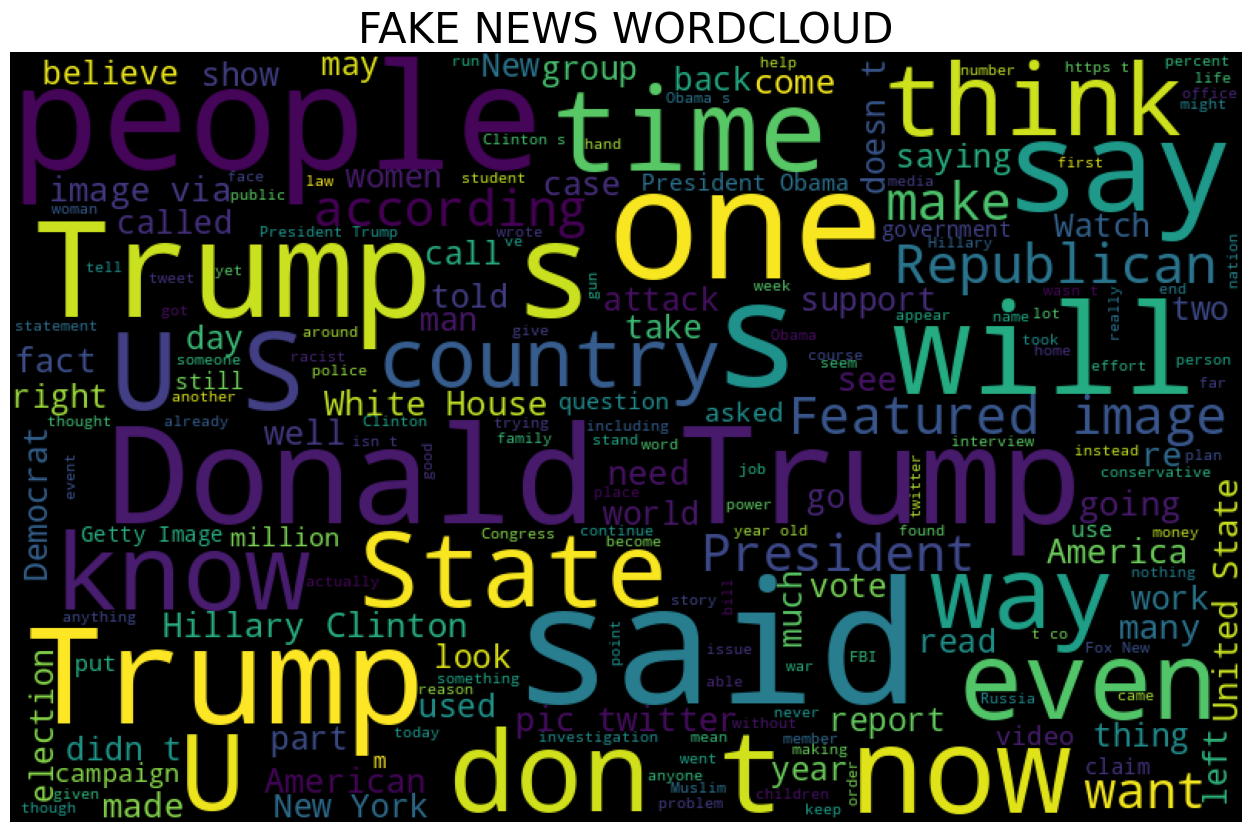

In [24]:
# Create and generate a word cloud image FAKE NEWS
fake_data_wc = df[df["target"] == "FAKE"]
fake_text = ' '.join([text for text in fake_data_wc.text])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(fake_text)
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.title('FAKE NEWS WORDCLOUD',fontsize= 30)
plt.show()

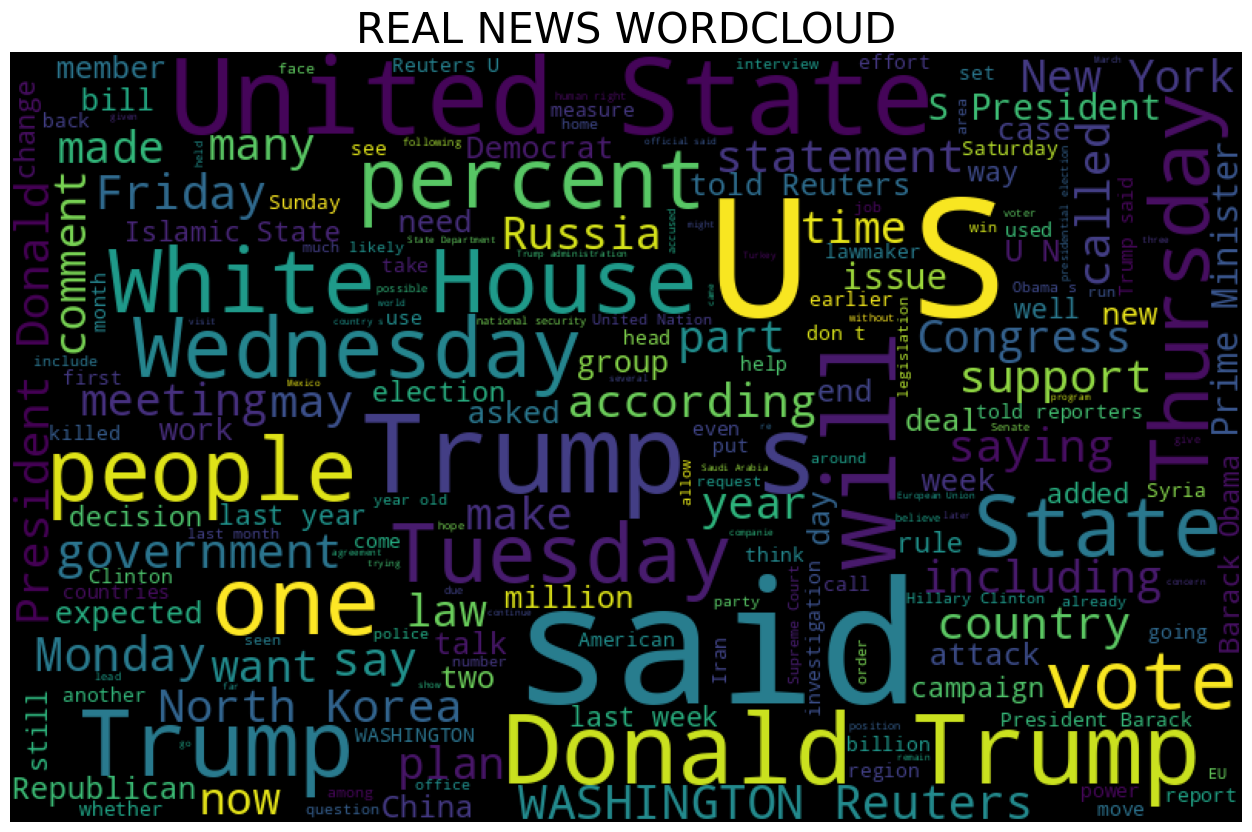

In [25]:
# Create and generate a word cloud image REAL NEWS
real_data_wc = df[df["target"] == "REAL"]
real_text = ' '.join([text for text in real_data_wc.text])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(real_text)
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.title('REAL NEWS WORDCLOUD',fontsize= 30)
plt.show()

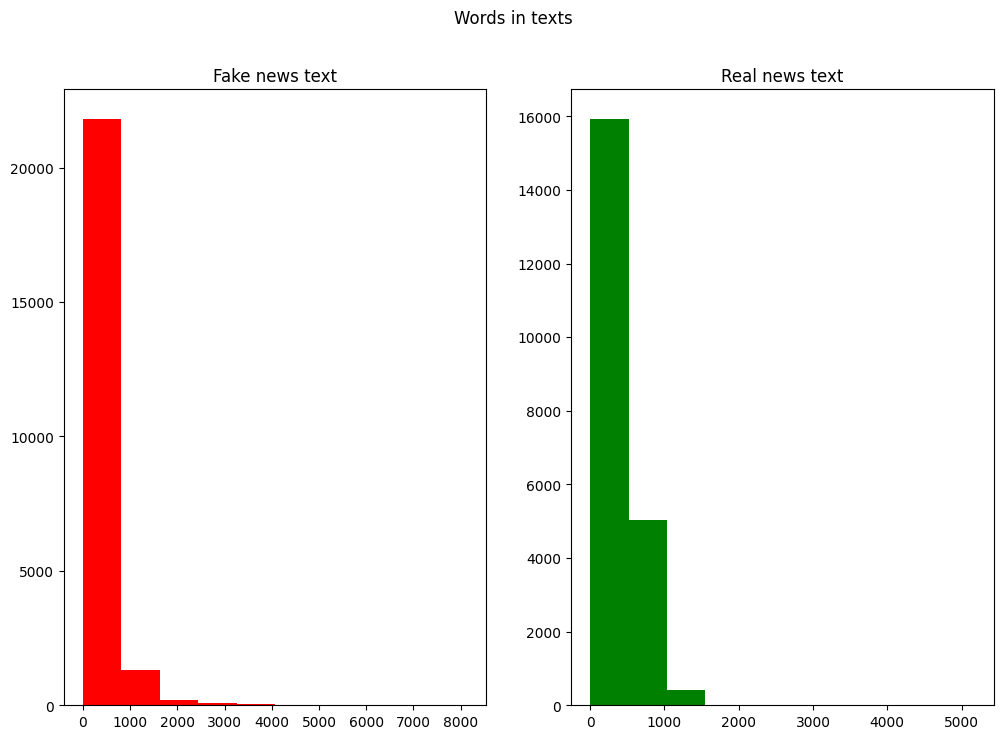

In [26]:
# Number of words in each text
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Plot histogram for Fake news text length
text_len = df[df['target'] == "FAKE"]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Fake news text')

# Plot histogram for Real news text length
text_len = df[df['target'] == "REAL"]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len, color='green')
ax2.set_title('Real news text')

fig.suptitle('Words in texts')
plt.show()

target
FAKE    23481
REAL    21417
Name: text, dtype: int64


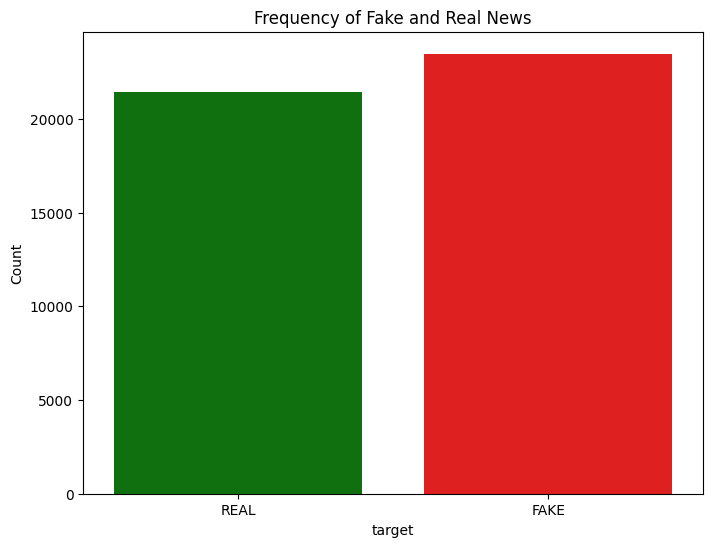

In [27]:
# Comparing the frequency of Fake and Real News
# Print the frequency of Fake and Real News
print(df.groupby(['target'])['text'].count())

# Define your custom colors for the countplot
custom_palette = {'FAKE': 'red', 'REAL': 'green'}

# Create a countplot using Seaborn and Matplotlib with custom colors
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette=custom_palette)
plt.title('Frequency of Fake and Real News')
plt.xlabel('target')
plt.ylabel('Count')
plt.show()

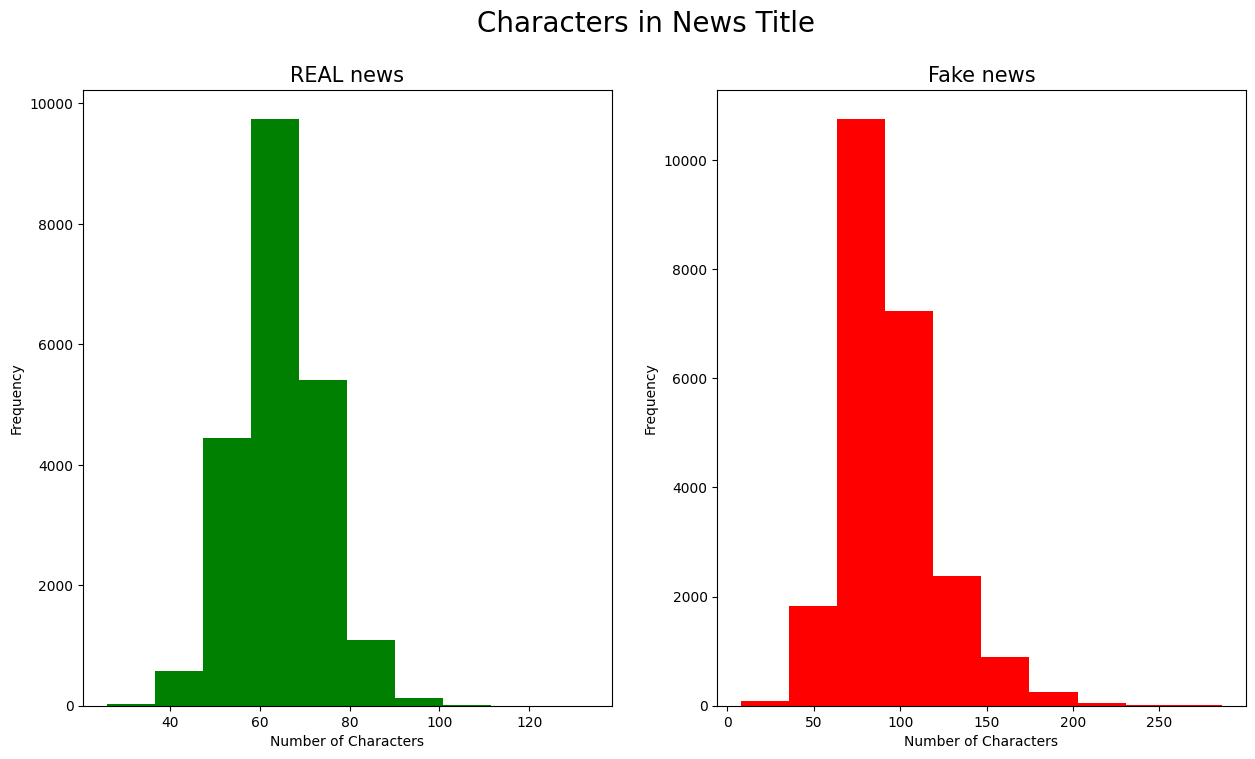

In [28]:
#Comparing the Total numbers of Characters in the Feature Title
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Characters in News Title', fontsize=20)

# Histogram for REAL news title lengths
news_len = df[df['target'] == 'REAL']['title'].str.len()
ax1.hist(news_len, color='green', linewidth=2) # , edgecolor='black'
ax1.set_title('REAL news', fontsize=15)

# Histogram for Fake news title lengths
news_len = df[df['target'] == 'FAKE']['title'].str.len()
ax2.hist(news_len, color='red', linewidth=2) # edgecolor='black'
ax2.set_title('Fake news', fontsize=15)

# Adding labels and styling
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel('Frequency')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Frequency')

plt.show()

## Bag of words

In [29]:
# Creating a bag of words with the consecutive frequency for fake text
fake_text_vis =' '.join([str(x) for x in df[df['target']=='FAKE']['New_text']])
a = nltk.FreqDist(fake_text_vis.split())
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
d.sample(10)

,Word,Count
54645,moveand,1
6009,craig,180
62251,meagain,1
31637,atthe,1
106074,bloodthe,4
58269,putindemocrats,1
85047,twitter3,1
14148,imagesyou,1
59553,warmingbreitbart,1
69243,holtman,1


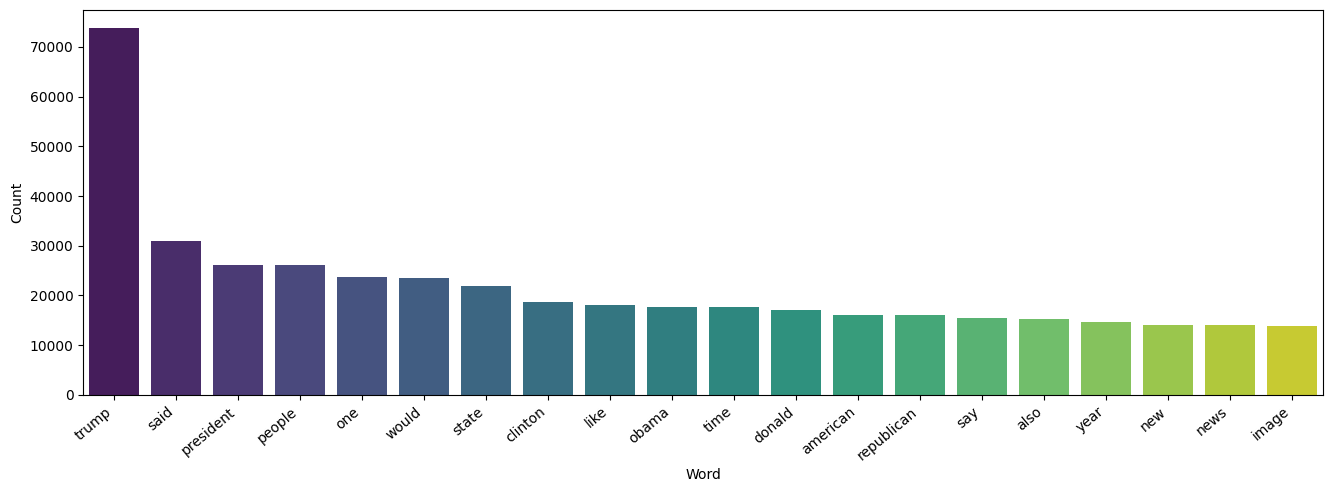

In [30]:
# Selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count", palette="viridis")
ax.set_xticklabels(d["Word"], rotation=40, ha="right")
ax.set(ylabel = 'Count')
plt.show()

In [31]:
# Creating a bag of words with the consecutive frequency for Real text
real_text_vis =' '.join([str(x) for x in df[df['target']=='REAL']['New_text']])
a = nltk.FreqDist(real_text_vis.split())
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
d.sample(10)

,Word,Count
18456,“critical,10
59464,deluz,2
34389,chacon’s,1
55189,cznational,1
43213,emeth,1
31817,madigan’s,7
73776,alharam,1
86423,lashkaretayyeba,2
51207,lazarus,7
14586,vegetable,29


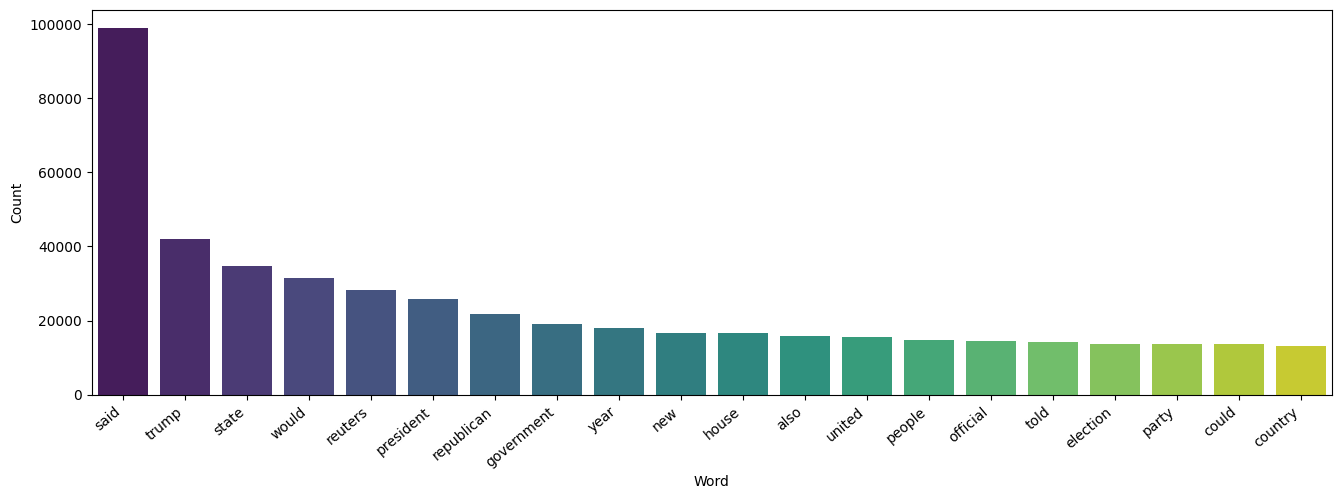

In [32]:
# Selecting top 20 most frequent hashtags 
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count", palette="viridis")
ax.set_xticklabels(d["Word"], rotation=40, ha="right")
ax.set(ylabel = 'Count')
plt.show()

In [33]:
df.head()

,title,text,subject,date,target,New_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL,seattlewashington reuters president donald tru...


In [34]:
df["target"]=df["target"].replace(["FAKE","REAL"],value=[1,0]) 

In [35]:
df.head()

,title,text,subject,date,target,New_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,seattlewashington reuters president donald tru...


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   target    44898 non-null  int64 
 5   New_text  44898 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


# IV. Baseline Model

I will be using Random Forest Classifier, Logistic regression model and Decision Tree Classifier. Then I will be comparing all three models to pick the best baseline model out for my project. Firstly I  will test the Random Forest Classifier.


In [37]:
X_train,X_test,y_train,y_test = train_test_split(df['New_text'],df['target'],test_size=0.2, random_state = 10)

In [38]:
# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Convert the text data into numerical features
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

# Print the shape
print(X_train.shape)
print(X_test.shape)

(35918, 195449)
(8980, 195449)


## 1. Random Forest Classifier

A Random Forest classifier is an ensemble machine learning algorithm that leverages the combined predictions of multiple decision trees to effectively classify online textual news as either genuine or fake. Its primary role in fake news detection is to analyze and categorize the content of news articles circulated online, aiding in the identification of misinformation. This algorithm contributes to understanding the veracity of online news stories.

In [39]:
# Random Forest Classifier (Model 1)
# Train model
random_forest_c_model= RandomForestClassifier()
random_forest_c_model.fit(X_train,y_train)

# Predict
random_forest_c_pred = random_forest_c_model.predict(X_test)

# Compute accuracy and cm
accuracy_rfc = accuracy_score(y_test,random_forest_c_pred)
cm_rfc = confusion_matrix(y_test,random_forest_c_pred)

# Print Accuracy and Confusion matrix
print("Accuracy score : {}".format(accuracy_rfc))
print("Confusion matrix : \n {}".format(cm_rfc))

Accuracy score : 0.9923162583518931
Confusion matrix : 
 [[4257    9]
 [  60 4654]]


In [40]:
# Print the classification report
print(classification_report(y_test, random_forest_c_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4266
           1       1.00      0.99      0.99      4714

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



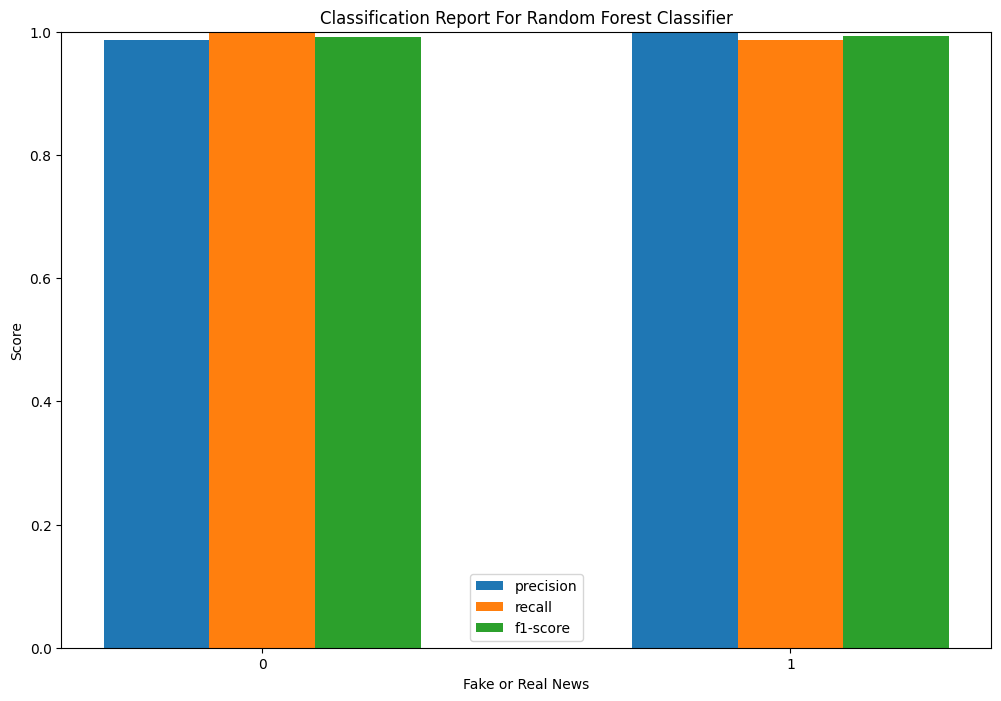

In [41]:
# precision, recall, and f1-score 
report = classification_report(y_test, random_forest_c_pred, output_dict=True)
labels = list(report.keys())[:-3]
metrics = ["precision", "recall", "f1-score"]

# Create a bar plot
plt.figure(figsize=(12, 8))
x = np.arange(len(labels))
width = 0.2

for i, metric in enumerate(metrics):
    scores = [report[label][metric] for label in labels]
    plt.bar(x + (i * width), scores, width, label = metric)

# Plot the graph
plt.xticks(x + width, labels)
plt.title("Classification Report For Random Forest Classifier")
plt.xlabel("Fake or Real News")
plt.ylabel("Score")
plt.ylim(0.00, 1.00)
plt.legend()
plt.show()

## 2. Logistic Regression Model

A logistic regression model is a statistical tool employed to forecast binary outcomes by estimating the likelihood of an event taking place. Its primary function within fake news detection is to assess and classify the textual content of online news articles, thereby assisting in the recognition of misinformation otherwise known as fake news.

In [42]:
# Logistic Regression model (Model 2)
#Train model
logistic_regression_model = LogisticRegression(max_iter = 500)
logistic_regression_model.fit(X_train, y_train)

#Predict
logistic_regression_pred = logistic_regression_model.predict(X_test)

# Compute accuracy and cm
accuracy_lrm = accuracy_score(y_test,logistic_regression_pred)
cm_lrm = confusion_matrix(y_test,logistic_regression_pred)

# Print Accuracy and Confusion matrix
print("Accuracy score : {}".format(accuracy_lrm))
print("Confusion matrix : \n {}".format(cm_lrm))

Accuracy score : 0.9904231625835189
Confusion matrix : 
 [[4237   29]
 [  57 4657]]


In [43]:
# Print the classification report
print(classification_report(y_test, logistic_regression_pred)) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4266
           1       0.99      0.99      0.99      4714

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



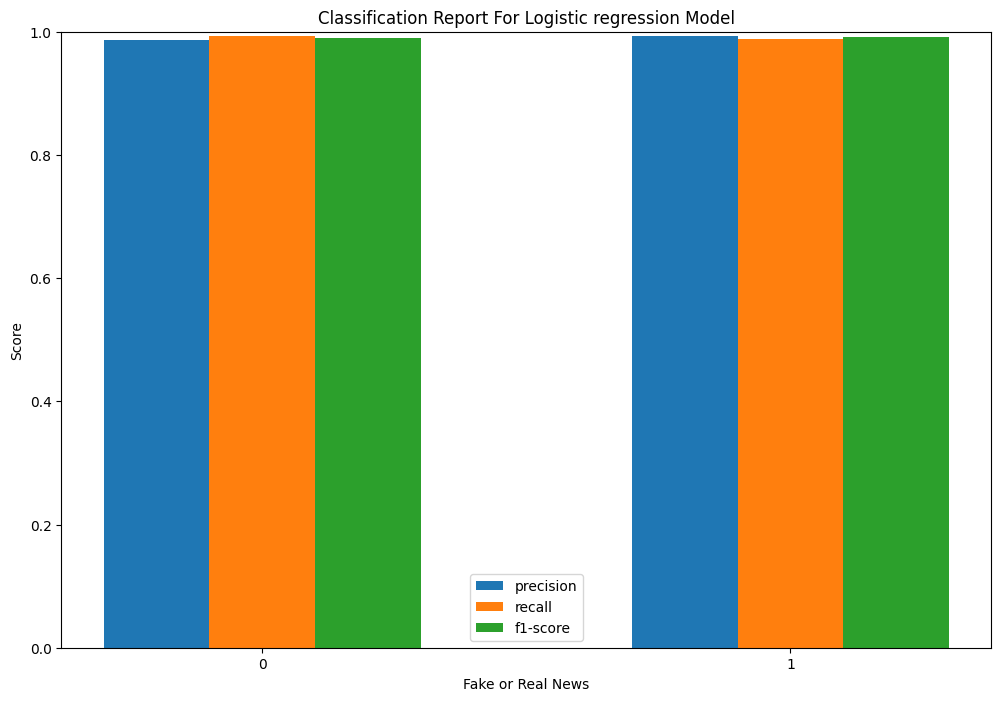

In [44]:
# precision, recall, and f1-score 
report = classification_report(y_test, logistic_regression_pred, output_dict=True)
labels = list(report.keys())[:-3]
metrics = ["precision", "recall", "f1-score"]

# Create a bar plot
plt.figure(figsize=(12, 8))
x = np.arange(len(labels))
width = 0.20

for i, metric in enumerate(metrics):
    scores = [report[label][metric] for label in labels]
    plt.bar(x + (i * width), scores, width, label = metric)

# Plot the graph
plt.xticks(x + width, labels)
plt.title("Classification Report For Logistic regression Model")
plt.xlabel("Fake or Real News")
plt.ylabel("Score")
plt.ylim(0.00, 1.00)
plt.legend()
plt.show()

## 3. Decision Tree Classifier

A Decision Tree Classifier is an algorithm in machine learning that constructs a hierarchical, tree-like framework for making predictions or classifying data. Its central purpose in fake news detection involves scrutinizing and categorizing the textual content present in online news articles, thus facilitating the process of flagging instances of misinformation.

In [45]:
#Decision Tree Classifier (Model 3)
# Train a the model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train,y_train)

# Prediction
decision_tree_pred  = decision_tree_model.predict(X_test)

# Compute the acc score and cm
accuracy_dtc  = accuracy_score(y_test, decision_tree_pred)
cm_dtc  = confusion_matrix(y_test, decision_tree_pred)

# Print the accuracy score and confusion matrix
print("The accuracy score for the desicion tree is : {}".format(accuracy_dtc))
print("Confusion matrix for the desicion tree is : \n {}".format(cm_dtc))

The accuracy score for the desicion tree is : 0.9979955456570155
Confusion matrix for the desicion tree is : 
 [[4258    8]
 [  10 4704]]


In [46]:
# Print the classification report
print(classification_report(y_test, decision_tree_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4266
           1       1.00      1.00      1.00      4714

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



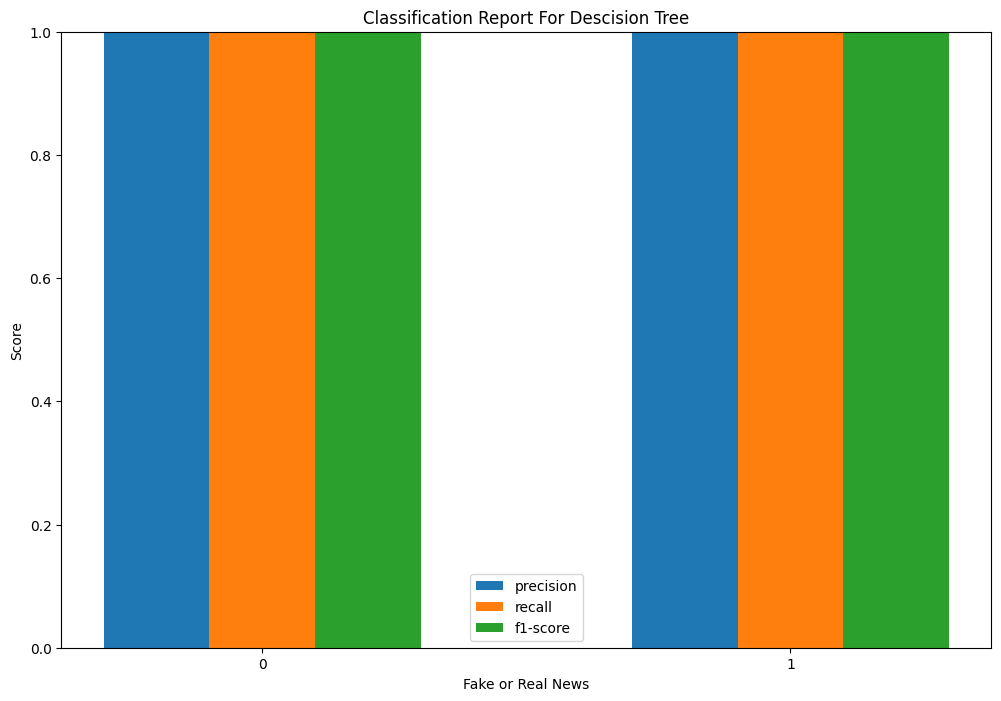

In [47]:
# precision, recall, and f1-score 
report = classification_report(y_test, decision_tree_pred, output_dict=True)
labels = list(report.keys())[:-3]
metrics = ["precision", "recall", "f1-score"]

# Create a bar plot 
plt.figure(figsize = (12, 8))
x = np.arange(len(labels))
width = 0.20

for i, metric in enumerate(metrics):
    scores = [report[label][metric] for label in labels]
    plt.bar(x + (i * width), scores, width, label = metric)

# Plot the graph
plt.xticks(x + width, labels)
plt.title("Classification Report For Descision Tree")
plt.xlabel("Fake or Real News")
plt.ylabel("Score")
plt.ylim(0.00, 1.00)
plt.legend()
plt.show()

### Accuracy Comparison

Now we will plot a graph which visually shows us the accuracy comparison of all 3 Models.

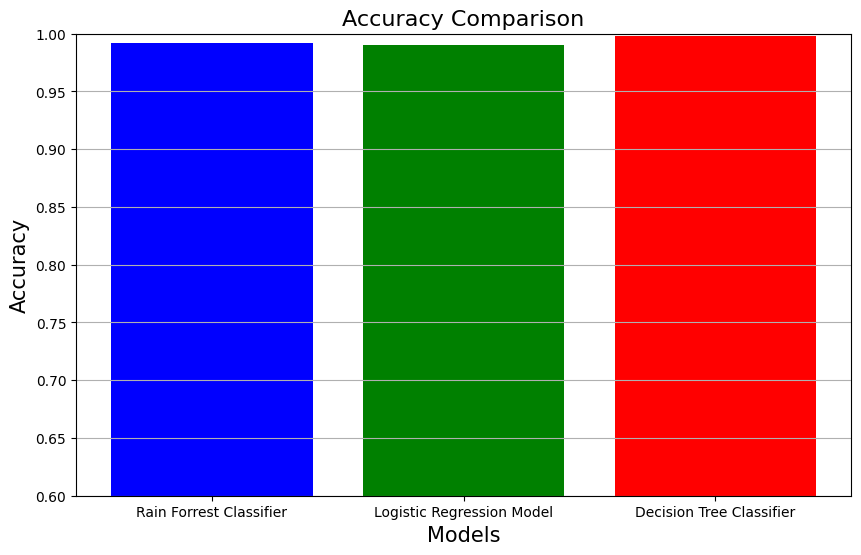

In [48]:
# Create a list of models and their accuracy scores
models = ['Rain Forrest Classifier', 'Logistic Regression Model', 'Decision Tree Classifier']
accuracy_scores = [accuracy_rfc, accuracy_lrm, accuracy_dtc]
colors = ['blue', 'green', 'red']

# Plot the accuracy scores as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=colors)
plt.title('Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim(0.60, 1.00)
plt.grid(axis='y')
plt.show()

### Comparing Model 1,  Model 2 and Model 3

<p>The Random Forest Classifier achieved an accuracy of 99.23% by correctly classifying 4257 instances as negative and 4654 instances as positive out of a total of 8980 samples. The Logistic Regression Model achieved an accuracy of 99.04% by correctly classifying 4237 instances as negative and 4657 instances as positive out of a total of 8980 samples. However, the Decision Tree Classifier outperformed both the Random Forest Classifier and Logistic Regression Model with an accuracy of 99.80%
    
Despite all three models demonstrating balanced precision, recall, and f1-scores for both classes, the <b>Decision Tree Classifier</b> displayed superior overall performance. Therefore, it can be considered a more dependable option in this particular scenario and the <b>baseline model</b> of this coursework.</p>

# V. Model Train and Test Phase

In [49]:
# Split the DataFrame 'df' into training and testing sets with a 80-20 ratio
df_train, df_test = train_test_split(df, test_size=1-0.8, random_state=42)

# Print the size (number of rows) of the training and testing sets
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 35918
TEST size: 8980


In [50]:
%%time

# Split the text content of each document in the 'df_train' DataFrame into a list of words
documents = [_text.split() for _text in df_train.text] 

CPU times: total: 1.19 s
Wall time: 1.23 s


## Word2Vec

Word2vec is a technique for natural language processing (NLP) that uses a neural network model to learn word associations from a large corpus of text. It represents each distinct word with a list of numbers called a vector, which captures the semantic and syntactic qualities of words. We will be using word2vec for our project.

In [51]:
# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

In [52]:
# Word2Vec model
w2v_model = gensim.models.word2vec.Word2Vec(vector_size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

In [53]:
# Build vocabulary for the Word2Vec model
w2v_model.build_vocab(documents)

In [54]:
# Find vocab size
words = list(w2v_model.wv.index_to_key)
vocab_size = len(words)
print("Vocab size:", vocab_size)

Vocab size: 48853


In [55]:
%%time

# Train the Word2Vec model
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

CPU times: total: 21min 9s
Wall time: 5min 2s


(356131952, 465262816)

## Tokenization

<p>Tokenization is the process of breaking down a text into smaller units called tokens. It is commonly used in natural language processing (NLP) tasks to analyze and process text data more effectively. Tokens can be words, phrases, symbols, or other meaningful units. Tokenization helps in organizing and understanding text by dividing it into manageable pieces for further analysis and processing.</p>

In [56]:
max_features = 10000
maxlen = 300

In [57]:
%%time

# Create a Tokenizer object and fit it on the text data in 'df_train'
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

# Calculate the vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Print the total number of unique words in the vocabulary
print("Total words", vocab_size)

Total words 125499
CPU times: total: 13.3 s
Wall time: 13.5 s


In [58]:
# KERAS
# Define the maximum sequence length
SEQUENCE_LENGTH = 300

# Define the number of training epochs
EPOCHS = 30

# Define the batch size for training data
BATCH_SIZE = 1024

In [59]:
%%time

# Convert the text in the training data to sequences of tokens and pad them to a fixed sequence length
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=SEQUENCE_LENGTH)

# Convert the text in the testing data to sequences of tokens and pad them to a fixed sequence length
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=SEQUENCE_LENGTH)

CPU times: total: 8.77 s
Wall time: 8.98 s


## Label Encoder

In the context of my fake news detection model project, I employed the Label Encoder with the intention of converting categorical data into a numerical format. This adaptation facilitates the effective processing and learning of data by machine learning algorithms, all while mitigating potential issues associated with ordinal relationships.

In [60]:
# Get the unique labels and convert them to a list
labels = df_train.target.unique().tolist()

labels

[1, 0]

In [61]:
# Create a LabelEncoder object
encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

# Transform the values into numerical labels
y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

# Reshape the label arrays to ensure compatibility with model training
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# Print the shapes of the transformed label arrays
print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (35918, 1)
y_test (8980, 1)


In [62]:
# Print values
print("x_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (35918, 195449)
y_train (35918, 1)

x_test (8980, 195449)
y_test (8980, 1)


In [63]:
y_train[:10]

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0]], dtype=int64)

## Embedding Layer

I've incorporated an embedding layer into my fake news detection model. This layer serves to convert words or tokens into meaningful numerical forms. Consequently, the model becomes capable of comprehending textual material in a manner that can be digested by the following neural network layers. This augmentation significantly improves the model's capacity to identify patterns, correlations, and potentially misleading information within news articles.

In [64]:
# Create an empty matrix for word embeddings with dimensions
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))

# Iterate through the word index from the Tokenizer
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
    
# Print the shape of the resulting embedding matrix
print(embedding_matrix.shape)

(125499, 300)


In [65]:
# Create an Embedding layer
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

## Training LSTM Model

The process of training the model encompasses the construction of a deep learning architecture, with meticulous consideration given to its design, tuning of hyperparameters, and subsequent assessment of its performance. The model's structure is composed of four distinct layers: an Embedding Layer, a Bidirectional LSTM Layer, a Dropout Layer, and a Dense Layer.

In [66]:
# Building a Sequential neural network model with Embedding, LSTM, Dropout, and Dense layers.
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          37649700  
                                                                 
 dropout (Dropout)           (None, 300, 300)          0         
                                                                 
 bidirectional (Bidirection  (None, 200)               320800    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 37970701 (144.85 MB)
Trainable params: 321001 (1.22 MB)
Non-trainable params: 37649700 (143.62 MB)
_________________________________________________________________


## Compile Model

In [67]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

## Callback

Callbacks are functions or blocks of code that are used in programming, particularly in asynchronous or event-driven scenarios. They are passed as arguments to other functions or methods. The main purpose of callbacks is to define what actions should be taken after a specific task or event has finished executing. We will now be using callbacks in our model.

In [68]:
# Define a list of callbacks
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

## Train model

In [69]:
%%time
# Fit the model to the training data
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/30
32/32 [==============================] - 1190s 37s/step - loss: 0.3823 - accuracy: 0.8306 - val_loss: 0.2095 - val_accuracy: 0.9323 - lr: 0.0010
Epoch 2/30
32/32 [==============================] - 1492s 47s/step - loss: 0.1850 - accuracy: 0.9303 - val_loss: 0.1639 - val_accuracy: 0.9502 - lr: 0.0010
Epoch 3/30
32/32 [==============================] - 1735s 54s/step - loss: 0.1420 - accuracy: 0.9495 - val_loss: 0.1631 - val_accuracy: 0.9468 - lr: 0.0010
Epoch 4/30
32/32 [==============================] - 1825s 57s/step - loss: 0.1182 - accuracy: 0.9599 - val_loss: 0.1243 - val_accuracy: 0.9588 - lr: 0.0010
Epoch 5/30
32/32 [==============================] - 1963s 61s/step - loss: 0.1044 - accuracy: 0.9634 - val_loss: 0.0984 - val_accuracy: 0.9691 - lr: 0.0010
Epoch 6/30
32/32 [==============================] - 2063s 65s/step - loss: 0.0902 - accuracy: 0.9682 - val_loss: 0.0936 - val_accuracy: 0.9691 - lr: 0.0010
Epoch 7/30
32/32 [==============================] - 2126s 66s/st

# VI. Analysis and Testing 

In [70]:
%%time

# Evaluate the model on the test data using the specified batch size
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)

# Print values
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

9/9 [==============================] - 78s 9s/step - loss: 0.0320 - accuracy: 0.9893

ACCURACY: 0.989309549331665
LOSS: 0.031973205506801605
CPU times: total: 32.6 s
Wall time: 1min 27s


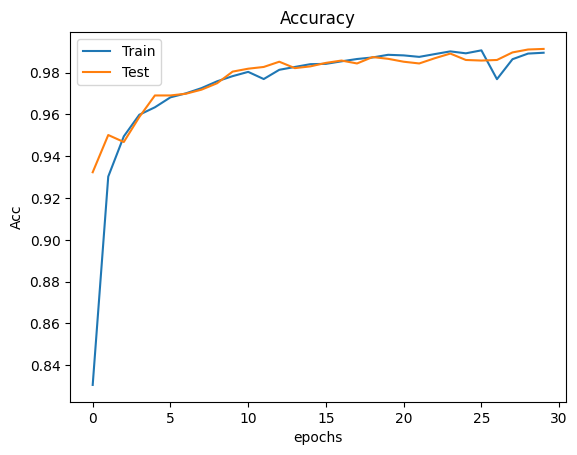

In [71]:
# Create a plot to visualize the training and testing accuracy over epochs
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

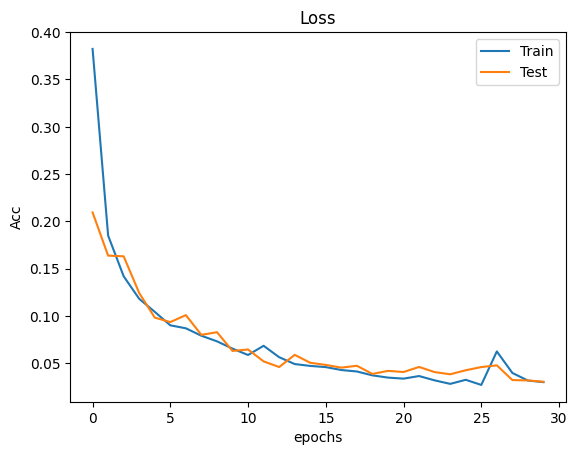

In [72]:
# Create a plot to visualize the training and testing loss over epochs
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [73]:
# Predict probabilities for each class
pred_probabilities = model.predict(x_test)

# Convert probabilities to class predictions using a threshold 
threshold = 0.5
pred = (pred_probabilities > threshold).astype(int)

281/281 [==============================] - 450s 2s/step


In [74]:
pred_model = model.predict(x_test)

281/281 [==============================] - 373s 1s/step


## Confusion Matrix

The confusion matrix is a useful tool for assessing the performance of a classification model. It helps in identifying the model's strengths and weaknesses by showing how well it predicts different classes. By analyzing the matrix, we can determine which classes the model predicts accurately and which ones may need improvement. We will be using it to access and identify our model's performance.

In [75]:
# Print the values
print("Length of y_test:", len(y_test))
print("Length of pred:", len(pred))

Length of y_test: 8980
Length of pred: 8980


In [76]:
# Defining a function for plotting a normalized confusion matrix
def cm_plot(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Remove NaN and 0.00 values from the confusion matrix
    cm = cm[~np.isnan(cm) & (cm != 0.00)]
    # Ensure cm is a square matrix by reshaping it to (n_classes, n_classes)
    n_classes = len(classes)
    cm = cm.reshape((n_classes, n_classes))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Real Target', fontsize=25) 
    plt.xlabel('Predicted Target', fontsize=25)

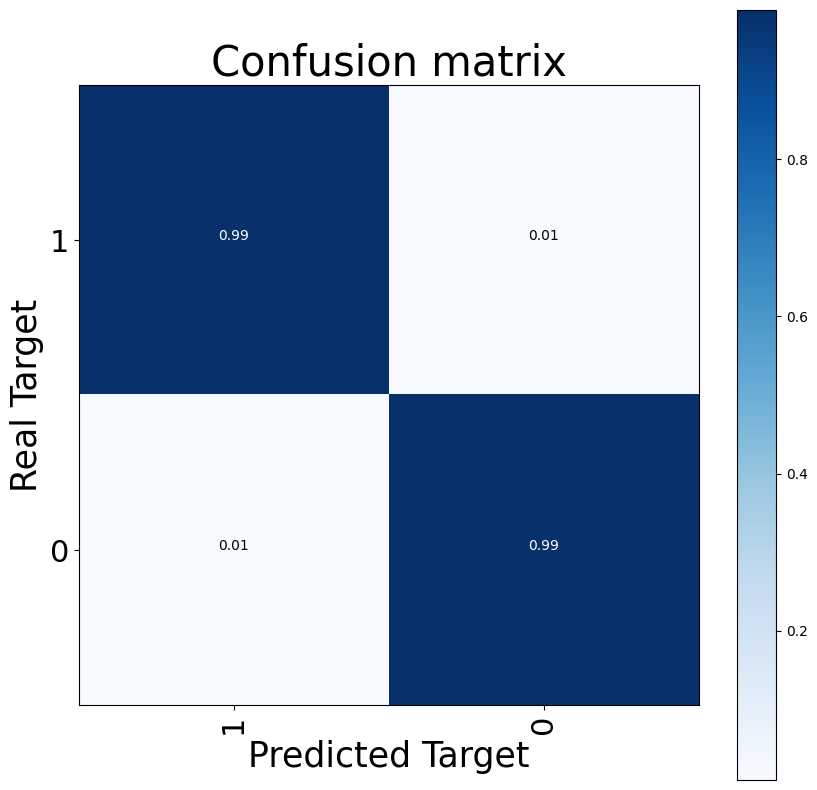

In [77]:
# Compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)

# Create a figure for the confusion matrix plot
plt.figure(figsize=(10,10))

# Call the custom cm_plot function
cm_plot(cnf_matrix, classes=df_train.target.unique(), title="Confusion matrix")

# Show the plot
plt.show()

In [78]:
# Save the model
model.save('bilstm_model')

INFO:tensorflow:Assets written to: bilstm_model\assets


INFO:tensorflow:Assets written to: bilstm_model\assets


In [79]:
# Print the classification report
print(classification_report(y_test, pred, target_names=['Fake', 'Real']))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4330
        Real       0.99      0.99      0.99      4650

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



My classification report provides the performance metrics for each news class, Fake and Real as well as overall metrics.

<b>Precision:</b>  For Fake, the precision is 0.99, and for Real, it is 0.99.

<b>Recall:</b>  For Fake, the recall is 0.99, and for Real, it is 0.99.

<b>F1-score:</b>  For Fake, the f1-score is 0.99, and for Real, it is 0.99.

<b>Support:</b>  It represents the number of samples in each class.

## Accuracy Score

In [80]:
# Define the class names
target_names = ['Fake', 'Real']

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


## Save the models

In [81]:
# Define filenames for saving the models
# model.save('bilstm_model')
bilstm_MODEL = 'model.keras'
WORD2VEC_MODEL = 'w2v_model.bin'
TOKENIZER_MODEL = 'tokenizer.pkl'
ENCODER_MODEL = 'encoder.pkl'

# Save the trained models
model.save(bilstm_MODEL)
w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)

In [82]:
# Save dataframe as csv
df.to_csv('real_fake_news.csv', index=False)

## Manual testing

In [83]:
# Placeholder functions for preprocessing steps
def do_fake_news_prediction(text):
    result_text_rem_punc = remove_punctuation(text)
    result_text_tokenize = tokenize(result_text_rem_punc)
    result_text_rem_small_words = rem_small_words(result_text_tokenize)
    result_text_rem_stopword = rem_stopword(result_text_rem_small_words)
    result_text_lemmatizer = lemmatizer(result_text_rem_stopword)
    result_text_return_sentences = return_sentences(result_text_lemmatizer)
    result_text = result_text_return_sentences
    
    # Load Word2Vec model
    w2v_model = gensim.models.Word2Vec.load('w2v_model.bin')
    
    # Tokenize text using the loaded tokenizer
    tokenizer = pickle.load(open('tokenizer.pkl', 'rb'))
    tokenized_text = tokenizer.texts_to_sequences([result_text])
    
    # Pad the tokenized text to a fixed length of 300 (adjust as needed)
    max_sequence_length = 300
    padded_text = pad_sequences(tokenized_text, maxlen=max_sequence_length)
    
    # Load BiLSTM model
    model = load_model('model.keras')
    
    # Predict using BiLSTM model
    predictions = model.predict(padded_text)
    
    return predictions

# Example usage to test 
fake_news_result = do_fake_news_prediction('Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.')
real_news_result = do_fake_news_prediction('WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trumpâ€™s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administrationâ€™s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. â€œThe Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DODâ€™s study and will continue to defend the presidentâ€™s lawful authority in District Court in the meantime,â€ the official said, speaking on condition of anonymity. In September, the Pentagon said it had created a panel of senior officials to study how to implement a directive by Trump to prohibit transgender individuals from serving. The Defense Department has until Feb. 21 to submit a plan to Trump. Lawyers representing currently-serving transgender service members and aspiring recruits said they had expected the administration to appeal the rulings to the conservative-majority Supreme Court, but were hoping that would not happen. Pentagon spokeswoman Heather Babb said in a statement: â€œAs mandated by court order, the Department of Defense is prepared to begin accessing transgender applicants for military service Jan. 1. All applicants must meet all accession standards.â€ Jennifer Levi, a lawyer with gay, lesbian and transgender advocacy group GLAD, called the decision not to appeal â€œgreat news.â€ â€œIâ€™m hoping it means the government has come to see that there is no way to justify a ban and that itâ€™s not good for the military or our country,â€ Levi said. Both GLAD and the American Civil Liberties Union represent plaintiffs in the lawsuits filed against the administration. In a move that appealed to his hard-line conservative supporters, Trump announced in July that he would prohibit transgender people from serving in the military, reversing Democratic President Barack Obamaâ€™s policy of accepting them. Trump said on Twitter at the time that the military â€œcannot be burdened with the tremendous medical costs and disruption that transgender in the military would entail.â€ Four federal judges - in Baltimore, Washington, D.C., Seattle and Riverside, California - have issued rulings blocking Trumpâ€™s ban while legal challenges to the Republican presidentâ€™s policy proceed. The judges said the ban would likely violate the right under the U.S. Constitution to equal protection under the law. The Pentagon on Dec. 8 issued guidelines to recruitment personnel in order to enlist transgender applicants by Jan. 1. The memo outlined medical requirements and specified how the applicantsâ€™ sex would be identified and even which undergarments they would wear. The Trump administration previously said in legal papers that the armed forces were not prepared to train thousands of personnel on the medical standards needed to process transgender applicants and might have to accept â€œsome individuals who are not medically fit for service.â€ The Obama administration had set a deadline of July 1, 2017, to begin accepting transgender recruits. But Trumpâ€™s defense secretary, James Mattis, postponed that date to Jan. 1, 2018, which the presidentâ€™s ban then put off indefinitely. Trump has taken other steps aimed at rolling back transgender rights. In October, his administration said a federal law banning gender-based workplace discrimination does not protect transgender employees, reversing another Obama-era position. In February, Trump rescinded guidance issued by the Obama administration saying that public schools should allow transgender students to use the restroom that corresponds to their gender identity.')
print(real_news_result)


1/1 [==============================] - 1s 1s/step
[[0.00304844]]


In [84]:
# Define manual_testing function
def manual_testing(news, model):
    
    # Apply preprocessing steps
    result_text = do_fake_news_prediction(news)
    
    print(result_text)
    
    # Display the prediction
    prediction_label = output_label(result_text)
    print("Model Prediction: {}".format(prediction_label))

# Placeholder function for output_label
def output_label(prediction):
    # If prediction >= threshold, return 'Fake News', else return 'Real News'
    if prediction >= 0.5: 
        return 'Fake News'
    else:
        return 'Real News'
                


In [85]:
# Call the manual_testing function
news = input("Enter the news text: ")
manual_testing(news, model)

Enter the news text: WEST PALM BEACH, Fla (Reuters) - President Donald Trump said on Thursday he believes he will be fairly treated in a special counsel investigation into Russian meddling in the U.S. presidential election, but said he did not know how long the probe would last. The federal investigation has hung over Trumpâ€™s White House since he took office almost a year ago, and some Trump allies have in recent weeks accused the team of Justice Department Special Counsel Robert Mueller of being biased against the Republican president. But in an interview with the New York Times, Trump appeared to shrug off concerns about the investigation, which was prompted by U.S. intelligence agenciesâ€™ conclusion that Russia tried to help Trump defeat Democrat Hillary Clinton by hacking and releasing embarrassing emails and disseminating propaganda. â€œThereâ€™s been no collusion. But I think heâ€™s going to be fair,â€ Trump said in what the Times described as a 30-minute impromptu interview 

# VII. Webpage 

I successfully created a web application for my fake news detection model with the help of HTML, CSS, Javvascript and Flask. This application allows users to input text, which is then sent to my model via an API. The model processes the text and provides a prediction, classifying it as either 'fake' or 'real.' This integration enables users to easily and interactively detect the authenticity of news articles and text on a user friendly web application.

In [86]:
%%writefile index.html

<!-- This HTML/CSS code defines a web interface for a Fake News Detection App.
     Users can input text or upload a file to predict whether it's fake or real news, 
     and view the prediction result on the web application page. -->

<!DOCTYPE html> 
<html lang="en"> 
  <head> 
    <meta charset="UTF-8" /> 
    <meta name="viewport" content="width=device-width, initial-scale=1.0" /> 
    <link rel="preconnect" href="https://fonts.googleapis.com" /> 
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin /> 
    <link 
      href="https://fonts.googleapis.com/css2?family=Roboto&display=swap" 
      rel="stylesheet" 
    /> 
    <title>Fake News Detection Application</title> 
    <style> 
      html { 
        box-sizing: border-box; 
        font-size: 100%; 
      } 
 
      *, 
      *::before, 
      *::after { 
        margin: 0; 
        padding: 0; 
        box-sizing: inherit; 
      } 
 
      body { 
        margin: 0; 
        padding: 0; 
        font-family: "Roboto", sans-serif; 
        min-height: 100vh; 
        background: radial-gradient(circle, rgb(238, 174, 202) 0%, rgb(148, 187, 233) 100%); 
      } 
 
      section { 
        width: 800px; 
        margin: 8rem auto; 
      } 
 
      section .container { 
        background: radial-gradient(circle, rgb(128, 198, 155) 0%, rgb(148, 187, 233) 100%); 
        color: rgb(17, 14, 14);
        border-radius: 1rem; 
        display: flex; 
        justify-content: center; 
        align-items: center; 
        flex-direction: column; 
        padding: 1rem; 
        gap: 1rem; 
#         box-shadow: -2px 10px 5px 0px rgba(0, 0, 0, 0.75); 
#         -webkit-box-shadow: -2px 10px 5px 0px rgba(0, 0, 0, 0.75); 
#         -moz-box-shadow: -2px 10px 5px 0px rgba(0, 0, 0, 0.75); 
        box-shadow: 0px 0px 5px 0px rgba(0, 0, 0, 0.75);
      } 
 
      section .container .inputfile { 
        width: 0.1px; 
        height: 0.1px; 
        opacity: 0; 
        overflow: hidden; 
        position: absolute; 
        z-index: -1; 
      } 
 
      section .container .inputfile + label { 
        font-size: 1.25em; 
        font-weight: 700; 
        color: white; 
        padding: 1rem 2rem; 
        border-radius: 2rem; 
        background-color: black; 
        display: inline-block; 
        transition: all 200ms ease-in-out; 
      } 
 
      section .container .inputfile:focus + label, 
      section .container .inputfile + label:hover { 
        background-color: red; 
      } 
 
      section .container .inputfile + label { 
        cursor: pointer; 
      } 
 
      section .container button { 
        display: inline-block; 
        font-size: 1em; 
        font-weight: 700; 
        color: black; 
        padding: 1rem 2rem; 
        border-radius: 2rem; 
        cursor: pointer; 
        transition: all 200ms ease-in-out; 
      } 
 
      section .container button:hover { 
        background-color: yellow; 
      } 
 
      section .container textarea { 
        margin: 1.5rem 0; 
        border: none; 
        text-align: center; 
        outline: none; 
      }   
    
      section .container prediction-result {
        font-size: 100px;
        margin-top: 20px;
      }
      
    </style> 
  </head> 
  
    <title>Fake News Detection App</title>
    <script>
    
        function limitWords(textarea, maxWords) {
            const text = textarea.value;
            const words = text.split(/\s+/);
            if (words.length > maxWords) {
                textarea.value = words.slice(0, maxWords).join(" ");
            }
            document.getElementById("word-count").textContent = `Word Count: ${words.length} / ${maxWords}`;
        }
        
        function showPrediction() {
            const predictionLabel = document.getElementById('prediction-result');
            predictionLabel.style.display = 'block'; 
        }
        
        function clearPrediction() {
            const predictTextarea = document.getElementById("predict");
            const predictionResultLabel = document.getElementById("prediction-result");

            // Clear the input textarea
            predictTextarea.value = "";

            // Hide the prediction result label
            predictionResultLabel.style.display = "none";

            // Reset the word count display
            document.getElementById("word-count").textContent = "Word Count: 0 / 1000";
        }

        document.addEventListener("DOMContentLoaded", function() {

            const predictTextarea = document.getElementById("predict");
            const fileInput = document.getElementById("file");
            const fileInputLabel = document.getElementById("file-label");
            const predictButton = document.getElementById("predictbtn");
            const uploadButton = document.getElementById("uploadbtn");
            const predictionResultLabel = document.getElementById("prediction-result");

            fileInput.addEventListener("change", () => {
                const selectedFile = event.target.files[0];
                if (selectedFile) {
                    //const fileContent = await readFileContent(selectedFile);
                    // predictTextarea.value = fileContent;
                    fileInputLabel.textContent = `Selected File: ${selectedFile.name}`;
                }
            });

            uploadButton.addEventListener("click", async() => {
                // Load content of selected file into predict textarea
                const selectedFile = fileInput.files[0];
                if (selectedFile) {
                    try {
                        const fileContent = await readFileContent(selectedFile);
                        predictTextarea.value = fileContent;
                    } catch (error) {
                        console.error("Error reading file:", error);
                    }
                }
            });

            predictButton.addEventListener("click", async () => {
                const predictionText = predictTextarea.value;
                const response = await fetch("http://localhost:5001/predict", {
                    method: "POST",
                    headers: {
                        "Content-Type": "application/json"
                    },
                    body: JSON.stringify({ text: predictionText })
                });

                if (response.ok) {
                    const predictionResult = await response.json();
                    // Update the predict textarea with the prediction result
                    predictionResultLabel.textContent = predictionResult.prediction;

                    // Change label color based on prediction
                    if (predictionResult.prediction === "Fake News") {
                        predictionResultLabel.style.color = "red";
                    } else if (predictionResult.prediction === "Real News") {
                        predictionResultLabel.style.color = "green";
                    } else {
                        // Default color if neither "Fake News" nor "Real News"
                        predictionResultLabel.style.color = "black";
                    }


                } else {
                    console.error("Failed to fetch prediction");
                }
            });


            async function readFileContent(file) {
                return new Promise((resolve, reject) => {
                    const reader = new FileReader();
                    reader.onload = (event) => {
                        resolve(event.target.result);
                    };
                    reader.onerror = (error) => {
                        reject(error);
                    };
                    reader.readAsText(file);
                });
            }


        });
    </script>
  
  <body> 
    <section> 
      <div class="container"> 
        <h1 class="__header">Fake News Detection App</h1> 
        <p class="__para"></p> 
 
        <input type="file" name="file" id="file" class="inputfile" accept="text/plain" /> 
         <label for="file" id="file-label">Choose a file</label>

        <div class="button-wrap"> 
          <button id='uploadbtn' name='uploadbtn'>upload</button> 
        </div> 
 
        <textarea 
          name="predict" 
          id="predict" 
          cols="80" 
          rows="10" 
          placeholder="input-text" 
          oninput="limitWords(this, 1000)" 
        ></textarea>
        <p id="word-count">Word Count: 0 / 1000</p>
            
        <div class="button-wrap">
          <button id='predictbtn' name='predictbtn' onclick="showPrediction()">Predict</button>
          <button id='clearbtn' name='clearbtn' onclick="clearPrediction()">Clear</button>
        </div>

        <label id='prediction-result' name='prediction-result' style='font-size: 30px; display: none;'>Prediction in progress...</label>

            
      </div> 
    </section> 
  </body> 
</html>


Overwriting index.html


### Displaying the HTML webpage

In [87]:
from IPython.display import HTML

html_content = '<iframe src="index.html" width="900" height="800"></iframe>'

display(HTML(html_content))

C:\Users\bhara\anaconda3\envs\BKNewTest\Lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Working Web Application

Run the web application on http://localhost:5001<br>
To submit news text within the web application, users can choose between uploading a text file (*.txt) or entering text directly into the text box.

In [88]:
from flask import Flask, render_template, request
from flask_cors import CORS


# Create a Flask web application instance
app = Flask(__name__)

# Enable CORS for all routes
CORS(app)

# Define routes and their corresponding functions
@app.route('/')
def home(): 
    import os
    # return os.getcwd()
    return render_template('index.html')

@app.route("/html")
def html():
    return render_template('index.html')

@app.route('/hello/<name>')
def hello(name):
    return f"Hello, {name}!"

@app.route('/predict', methods=['POST'])
def predict():
    prediction_text = request.json.get('text', '')
    print(prediction_text)
    prediction = do_fake_news_prediction(prediction_text)
 
    # Assuming the model outputs a probability (0-1)
    if prediction >= 0.5:
        result = 'Fake News'
        print(f"{prediction}")
        print("Fake News")
    else:
        result = 'Real News'
        print(f"{prediction}")
        print("Real News")
        
    return {'prediction': result}

# Run the Flask app
if __name__ == '__main__':
    app.run(host='localhost', port=5001)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://localhost:5001
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [08/Sep/2023 12:18:05] "GET / HTTP/1.1" 200 -


Republicans are working overtime trying to sell their scam of a tax bill to the public as something that directly targets middle-class and working-class families with financial relief. Nothing could be further from the truth, and they re getting hammered on that repeatedly. Speaking on CNBC, Paul Ryan was going full throttle, trying to convince us that the paltry savings we re getting is actually wait for it big money.But he didn t just go with the usual talking points. With a smug look that only someone who grew up in a wealthy family can muster when talking about that which he does not know, Ryan claimed that the $2,059 more per year that families living paycheck-to-paycheck will see is extremely significant. Then he decided he had to amend that to say such savings might be nothing to a family earning $600,000 per year (true), or for people living in New York or California (false).Those are the same two states that Trump s loyal subjects insist on stripping from the 2016 vote totals 

1/1 [==============================] - 1s 565ms/step


INFO:werkzeug:127.0.0.1 - - [08/Sep/2023 12:18:31] "POST /predict HTTP/1.1" 200 -


[[0.99999404]]
Fake News


INFO:werkzeug:127.0.0.1 - - [08/Sep/2023 12:18:51] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [08/Sep/2023 12:18:53] "GET / HTTP/1.1" 200 -


NEW YORK/WASHINGTON (Reuters) - The new U.S. tax code targets high-tax states and may be unconstitutional, New York Governor Andrew Cuomo said on Thursday, saying that the bill may violate New York residentsâ€™ rights to due process and equal protection.  The sweeping Republican tax bill signed into law by U.S. President Donald Trump on Friday introduces a cap, of $10,000,  on deductions of state and local income and property taxes, known as SALT. The tax overhaul was the partyâ€™s first major legislative victory since Trump took office in January.  The SALT provision will hit many taxpayers in states with high incomes, high property values and high taxes, like New York, New Jersey and California. Those states are generally Democratic leaning.  â€œIâ€™m not even sure what they did is legally constitutional and thatâ€™s something weâ€™re looking at now,â€ Cuomo said in an interview with CNN. In an interview with CNBC, Cuomo suggested why the bill may be unconstitutional.  â€œPolitics d

1/1 [==============================] - 1s 538ms/step


INFO:werkzeug:127.0.0.1 - - [08/Sep/2023 12:19:07] "POST /predict HTTP/1.1" 200 -


[[0.00046983]]
Real News


### Webpage Screenshot
Here is a screenshot displaying two distinct predictions, namely "Prediction 1" and "Prediction 2" which have been generated by the web application through the utilization of an API. These predictions correspond to the classification of news articles as "Real News" and "Fake News" respectively.
<img src="NLP_FakeNewsDetection_Webpage.png"/>

# VIII. Evaluation

Based on the classification report provided, we have achieved the following report below for my fake news detection model.

<b>Precision:</b>  For Fake, the precision is 0.99, and for Real, it is 0.99.

<b>Recall:</b>  For Fake, the recall is 0.99, and for Real, it is 0.99.

<b>F1-score:</b>  For Fake, the f1-score is 0.99, and for Real, it is 0.99.

<b>Support:</b>  It represents the number of samples in each class.

<b>Overall Accuracy:</b> The overall accuracy of the model is 99%.

# IX. Conclusion

Throughout the course, my primary focus revolved around constructing a model for identifying fake news by leveraging the capabilities of Natural Language Processing (NLP) and Machine Learning (ML). This undertaking encompassed multiple steps, commencing with the collection and preparation of data, ensuring its quality and relevancy. After evaluating three distinct models, I selected a baseline model as the foundation, subsequently refining and assessing the performance of a customized model. The conclusive model exhibited a noteworthy proficiency in accurately categorizing news, showcasing favorable precision, recall, and F1-score metrics. On the whole, the model achieved an impressive accuracy level of 99%. To extend its accessibility, I integrated the model into a web page using API, facilitating real-time fake news detection for users.